# Demo notebook for LatinCy model `la_core_web_trf`

Written by [Patrick J. Burns](https://diyclassics.github.io). Last updated July 2024.

In [1]:
# Imports 

import spacy
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
from spacy import displacy
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# Set up spaCy NLP

model = 'la_core_web_trf'
nlp = spacy.load(model)
print(f'Loaded model: {model} v{nlp.meta["version"]}')

/Users/pjb311/.pyenv/versions/3.10.8/envs/latincy-scratch/lib/python3.10/site-packages/spacy_transformers/layers/hf_shim.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


Loaded model: la_core_web_trf v3.7.7


In [3]:
pprint(nlp.pipe_names)

['senter',
 'transformer',
 'normer',
 'tagger',
 'morphologizer',
 'trainable_lemmatizer',
 'parser',
 'lookup_lemmatizer',
 'ner']


In [4]:
# Get sample text; first story from Ritchie's fables

text = """Haec narrantur a poetis de Perseo. Perseus filius erat Iovis, maximi deorum; avus eius Acrisius appellabatur. Acrisius volebat Perseum nepotem suum necare; nam propter oraculum puerum timebat. Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit. Tum arcam ipsam in mare coniecit. Danae, Persei mater, magnopere territa est; tempestas enim magna mare turbabat. Perseus autem in sinu matris dormiebat."""

text =  text.replace("v","u").replace("V","U")

In [5]:
# Create spacy Doc object

doc = nlp(text)

/Users/pjb311/.pyenv/versions/3.10.8/envs/latincy-scratch/lib/python3.10/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


In [6]:
# Helper function
def enumerate_print(l):
    for i, x in enumerate(l, 1):
        print(f"{i}: {x}")

In [7]:
# Get sentences from text

sents = doc.sents

enumerate_print(sents)

1: Haec narrantur a poetis de Perseo.
2: Perseus filius erat Iouis, maximi deorum;
3: auus eius Acrisius appellabatur.
4: Acrisius uolebat Perseum nepotem suum necare;
5: nam propter oraculum puerum timebat.
6: Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit.
7: Tum arcam ipsam in mare coniecit.
8: Danae, Persei mater, magnopere territa est;
9: tempestas enim magna mare turbabat.
10: Perseus autem in sinu matris dormiebat.


In [8]:
# Get tokens from text

for token in doc:
    print(token)
    print(type(token))
    print([item for item in dir(token) if not item.startswith("_")])
    break

Haec
<class 'spacy.tokens.token.Token'>
['ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'morph', 'n_lefts', 'n_rights', 'nbor', 'norm', 'norm_', 'orth', 'orth_', 'pos', 'pos_', 'prefix', 'prefix_', 'prob', 'rank', 'remove_extension', 'right_edge', 'rights', 'sent', 'sent_start', 'sentiment', 'set_extension', 'set_morph', 'shape', 'shape_', 'similarity', 'subtree', 'suffix'

In [9]:
# Make dataframe with token attributes

data = []

for token in doc[:25]:
    data.append(
        [
            token.text,
            token.norm_,
            token.lower_,
            token.lemma_,
            token.pos_,
            token.tag_,
            token.dep_,
            token.has_vector,
            token.morph,
            token.ent_type_,
            token.text in nlp.vocab,
            token.is_oov,
        ]
    )

df = pd.DataFrame(
    data,
    columns=[
        "text",
        "norm",
        "lower",
        "lemma",
        "pos",
        "tag",
        "dep",
        "has_vector",
        "morph",
        "ent_type",
        "in_vocab",
        "is_oov",
    ],
)

df

,text,norm,lower,lemma,pos,tag,dep,has_vector,morph,ent_type,in_vocab,is_oov
0,Haec,haec,haec,hic,DET,adjective,nsubj:pass,False,"(Case=Nom, Gender=Neut, Number=Plur)",,True,True
1,narrantur,narrantur,narrantur,narro,VERB,verb,ROOT,False,"(Mood=Ind, Number=Plur, Person=3, Tense=Pres, ...",,True,True
2,a,a,a,ab,ADP,preposition,case,False,(),,True,True
3,poetis,poetis,poetis,poeta,NOUN,noun,obl:agent,False,"(Case=Abl, Gender=Masc, Number=Plur)",,True,True
4,de,de,de,de,ADP,preposition,case,False,(),,True,True
5,Perseo,perseo,perseo,Perseus,PROPN,proper_noun,obl,False,"(Case=Abl, Gender=Masc, Number=Sing)",PERSON,True,True
6,.,.,.,.,PUNCT,punc,punct,False,(),,True,True
7,Perseus,perseus,perseus,Perseus,PROPN,proper_noun,nsubj,False,"(Case=Nom, Gender=Masc, Number=Sing)",PERSON,True,True
8,filius,filius,filius,filius,NOUN,noun,ROOT,False,"(Case=Nom, Gender=Masc, Number=Sing)",,True,True
9,erat,erat,erat,sum,AUX,verb,cop,False,"(Mood=Ind, Number=Sing, Person=3, Tense=Imp, V...",,True,True


In [10]:
# Show dependency parse for sample sentence

text = """Tum arcam ipsam in mare coniecit."""
text =  text.replace("v","u").replace("V","U")

sents = nlp(text).sents

for sent in sents:
    print(f'spaCy dependecy parse for "{sent}"')
    displacy.render(sent, style="dep", jupyter=True)
    break

spaCy dependecy parse for "Tum arcam ipsam in mare coniecit."


/Users/pjb311/.pyenv/versions/3.10.8/envs/latincy-scratch/lib/python3.10/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


In [11]:
# Noun chunks

selection = doc

selection.spans['NP'] = []
for chunk in selection.noun_chunks:
    if len(chunk) > 1:
        selection.spans['NP'].append(chunk)

colors = {'NP': '#85C1E9'}
options = {'spans_key': 'NP', 'colors': colors}
displacy.render(selection, style="span", jupyter=True, options=options)

In [12]:
# Named entities

text = """Iason et Medea e Thessalia expulsi ad urbem Corinthum venerunt, cuius urbis Creon quidam regnum tum obtinebat."""
text =  text.replace("v","u").replace("V","U")

doc = nlp(text)

print(f'spaCy displayed entities for "{text}"')
displacy.render(doc, style="ent", jupyter=True)

spaCy displayed entities for "Iason et Medea e Thessalia expulsi ad urbem Corinthum uenerunt, cuius urbis Creon quidam regnum tum obtinebat."


In [13]:
# Plot proper_noun vectors with TSNE based on Ritchie's fables

with open('ritchies.txt', 'r') as f:
    contents = f.readlines()
    text = " ".join([line.strip() for line in contents if line.strip() and not line.startswith('#')])
    doc = nlp(text)

In [14]:
# Get trf vectors
# cf. https://gist.github.com/yeus/a4d7cc6c97485597eb1e0d7fd720b4e3

from spacy.language import Language
from spacy.tokens import Doc

@Language.factory('trf_vectors')
class TrfContextualVectors:
    """
    Spacy pipeline which add transformer vectors to each token based on user hooks.
    https://spacy.io/usage/processing-pipelines#custom-components-user-hooks
    https://github.com/explosion/spaCy/discussions/6511
    """

    def __init__(self, nlp: Language, name: str):
        self.name = name
        Doc.set_extension("trf_token_vecs", default=None)

    def __call__(self, sdoc):
        # inject hooks from this class into the pipeline
        if type(sdoc) == str:
            sdoc = self._nlp(sdoc)

        # pre-calculate all vectors for every token:

        # calculate groups for spacy token boundaries in the trf vectors
        vec_idx_splits = np.cumsum(sdoc._.trf_data.align.lengths)
        # get transformer vectors and reshape them into one large continous tensor
        trf_vecs = sdoc._.trf_data.tensors[0].reshape(-1, 768)
        # calculate mapping groups from spacy tokens to transformer vector indices
        vec_idxs = np.split(sdoc._.trf_data.align.dataXd, vec_idx_splits)

        # take sum of mapped transformer vector indices for spacy vectors
        vecs = np.stack([trf_vecs[idx].sum(0) for idx in vec_idxs[:-1]])
        sdoc._.trf_token_vecs = vecs

        sdoc.user_token_hooks["vector"] = self.vector
        # sdoc.user_span_hooks["vector"] = self.vector
        # sdoc.user_hooks["vector"] = self.vector
        sdoc.user_token_hooks["has_vector"] = self.has_vector
        # sdoc.user_token_hooks["similarity"] = self.similarity
        # sdoc.user_span_hooks["similarity"] = self.similarity
        # sdoc.user_hooks["similarity"] = self.similarity
        return sdoc

    def vector(self, token):
        return token.doc._.trf_token_vecs[token.i]

    def has_vector(self, token):
        return True

In [15]:
# Add pip, re-run nlp

nlp.add_pipe('trf_vectors', name='trf_vectors', last=True)
doc = nlp(text) # NB: will take a bit of time to run

In [16]:
# Clearer with fewer elements; so only proper_nouns; extract vectors for text

vector_dict = {}

for item in doc:
    if item.tag_ == "proper_noun":
        vector_dict[item.norm_] = item.vector
        
words = list(vector_dict.keys())
vecs = list(vector_dict.values())

In [17]:
# Reduce vectors to 2D with UMAP; make dataframe
umap_reducer = umap.UMAP(n_components=2)
reduced_vecs = umap_reducer.fit_transform(np.asarray(vecs))
df = pd.DataFrame(reduced_vecs, index=words, columns=['x', 'y'])
df['word'] = df.index

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


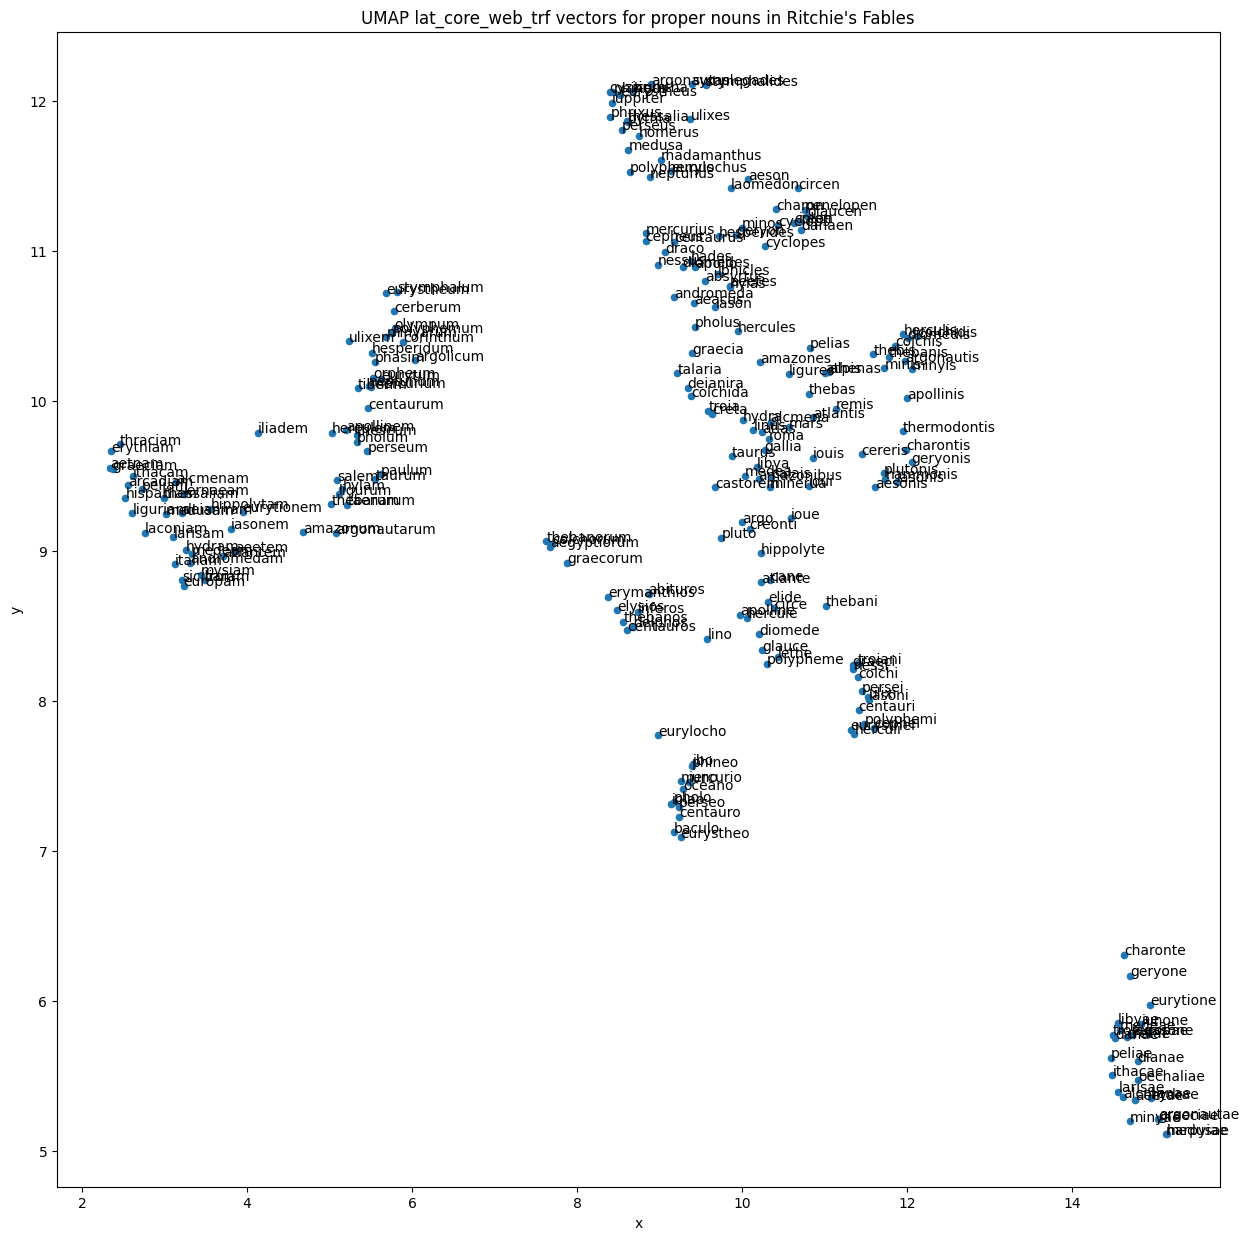

In [18]:
# Plot TSNE

ax = df.plot(kind='scatter', x='x', y='y', figsize=(15, 15), title="UMAP lat_core_web_trf vectors for proper nouns in Ritchie's Fables")

for idx, row in df.iterrows():
    ax.annotate(row['word'], (row['x'], row['y']))

In [19]:
# Extract vectors for "cum" as ADP or SCONJ

cum_adp = []
cum_conj = []

for item in doc:
    if item.text == "cum":
        if item.pos_ == "ADP":
            cum_adp.append(item.vector)
        elif item.pos_ == "SCONJ":
            cum_conj.append(item.vector)

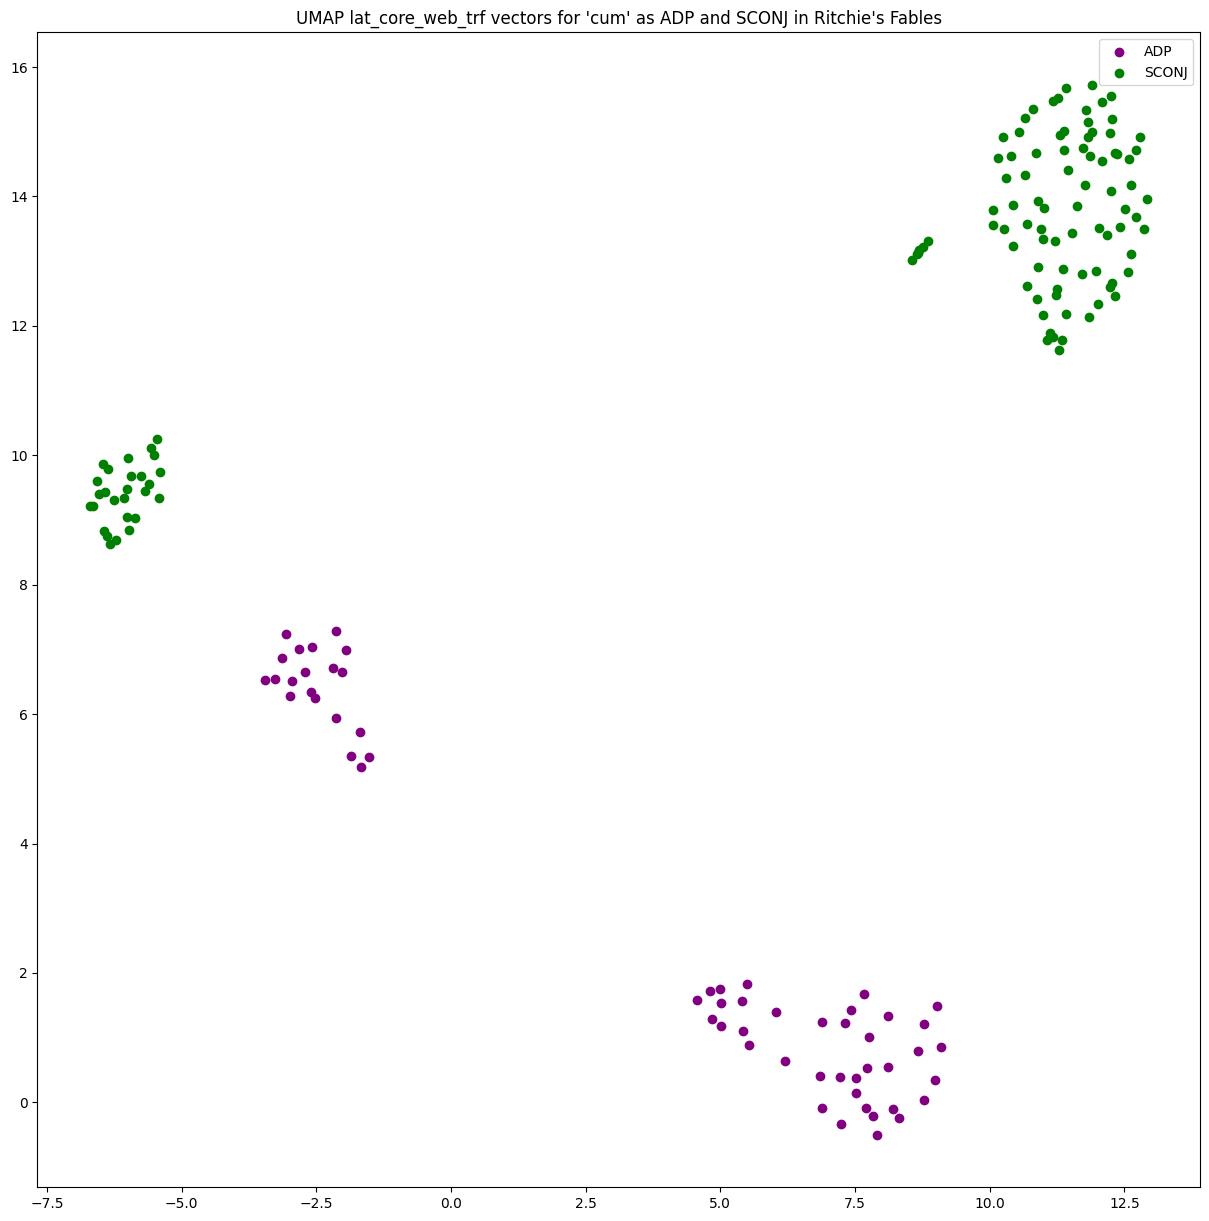

In [20]:
# Create UMAP projections
umap_reducer = umap.UMAP(n_components=2)
reduced_cum_adp = umap_reducer.fit_transform(np.asarray(cum_adp))
reduced_cum_conj = umap_reducer.fit_transform(np.asarray(cum_conj))

# Create DataFrames
df_adp = pd.DataFrame(reduced_cum_adp, columns=['x', 'y'])
df_conj = pd.DataFrame(reduced_cum_conj, columns=['x', 'y'])

# Plot UMAP
plt.figure(figsize=(15, 15))
plt.scatter(df_adp['x'], df_adp['y'], c='purple', label="ADP")
plt.scatter(df_conj['x'], df_conj['y'], c='green', label="SCONJ")


plt.title("UMAP lat_core_web_trf vectors for 'cum' as ADP and SCONJ in Ritchie's Fables")
plt.legend()
plt.show()